# Modelo SIEAR


Este modelo compartimental descreve a evolução de uma doença com as seguintes populações:

* **S(t)** : suscetíveis
* **E(t)** : expostos (infectados, incubando, ainda não infecciosos)
* **I(t)** : infectados assintomáticos (transmitem, mas não detectáveis)
* **A(t)** : infectados sintomáticos (transmitem, detectáveis)
* **R(t)** : removidos (curados ou mortos)

A população total é:

$$
N = S(t) + E(t) + I(t) + A(t) + R(t)
$$

As equações diferenciais são:

$$
\begin{aligned}
\frac{dS}{dt} &= -\beta_I \cdot \frac{S I}{N} - \beta_A \cdot \frac{S A}{N} \\\\
\frac{dE}{dt} &= \beta_I \cdot \frac{S I}{N} + \beta_A \cdot \frac{S A}{N} - \sigma E \\\\
\frac{dI}{dt} &= p \cdot \sigma E - \gamma_I I \\\\
\frac{dA}{dt} &= (1 - p) \cdot \sigma E - \gamma_A A \\\\
\frac{dR}{dt} &= \gamma_I I + \gamma_A A
\end{aligned}
$$

---

### 📋 Parâmetros

* **$\beta_I$** : taxa de transmissão dos assintomáticos  
* **$\beta_A$** : taxa de transmissão dos sintomáticos  
* **$\sigma$**  : taxa de progressão dos expostos para infecciosos (1/incubação)  
* **$p$** : fração dos expostos que se tornam assintomáticos  
* **$\gamma_I$** : taxa de recuperação dos assintomáticos  
* **$\gamma_A$** : taxa de recuperação dos sintomáticos
* **N** : população total (constante)


---

### 📊 Casos acumulados

Podemos definir os **casos clínicos acumulados** (sintomáticos detectáveis) como:

$$
C(t) = A(t) + R(t)
$$

E sua derivada é:

$$
\frac{dC}{dt} = (1 - p) \cdot \sigma E
$$

Essa fórmula representa o número de **novos casos detectáveis** por unidade de tempo.

---


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import modelos_epidemiologicos as model 

Vamos supor uma população de 1000 indivíduos com uma pessoa infectada( **Io=1**). Se a taxa de contato  for 0.2 ( **β=0.2**) e a taxa de recuperaçãofor de 10 dias ( **γ=1/10**). Inicialmente o número de pessoas recuperadas é zero. (**Ro=0**). Como será a propagação da doença pelos próximos 200 dias.

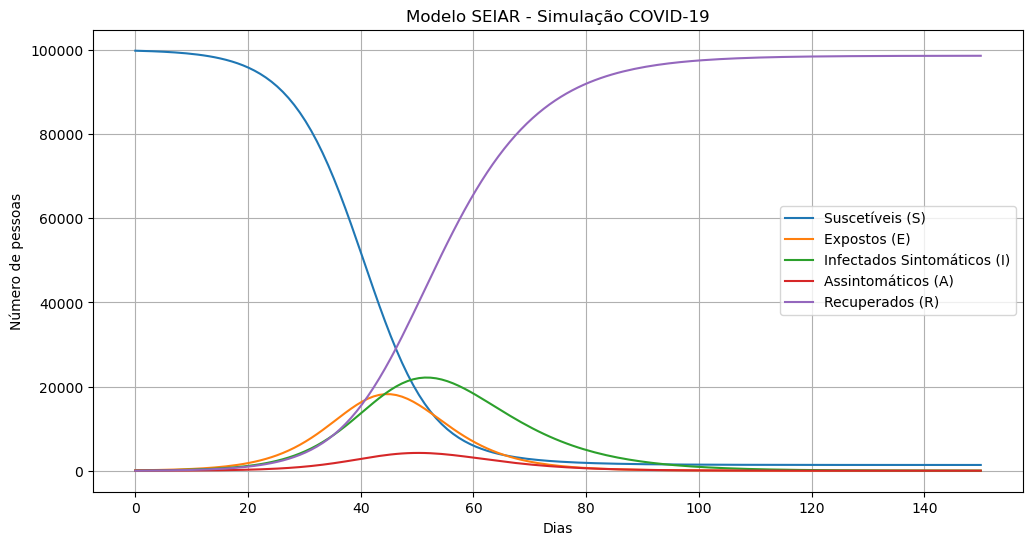

In [10]:
# Definindo parametros da população

# Parâmetros (COVID-19 exemplo)
N = 100000       # População total
beta = 0.5          # Taxa de transmissão (sintomáticos)
alpha = 1/5.2       # Taxa de incubação
gamma_I = 1/10      # Recuperação sintomáticos (10 dias)
gamma_A = 1/7       # Recuperação assintomáticos (7 dias)
rho = 0.2           # 20% assintomáticos
kappa = 0.5         # Transmissão relativa de assintomáticos


# Condições iniciais
E0 = 100            # 100 expostos inicialmente
I0 = 50             # 50 infectados sintomáticos
A0 = 30             # 30 assintomáticos
R0 = 0

S0 = N - E0 - I0 - A0 - R0
y0 = [S0, E0, I0, A0, R0]

# período
t=np.linspace(0,150,150)

out = odeint(model.SEIAR, y0, t, args=(N, beta,alpha,gamma_I,gamma_A,rho,kappa))
S,E,I,A,R = out.T 

plt.figure(figsize=(12, 6))
plt.plot(t, S, label='Suscetíveis (S)')
plt.plot(t, E, label='Expostos (E)')
plt.plot(t, I, label='Infectados Sintomáticos (I)')
plt.plot(t, A, label='Assintomáticos (A)')
plt.plot(t, R, label='Recuperados (R)')
plt.xlabel('Dias')
plt.ylabel('Número de pessoas')
plt.title('Modelo SEIAR - Simulação COVID-19')
plt.legend()
plt.grid()
plt.show()

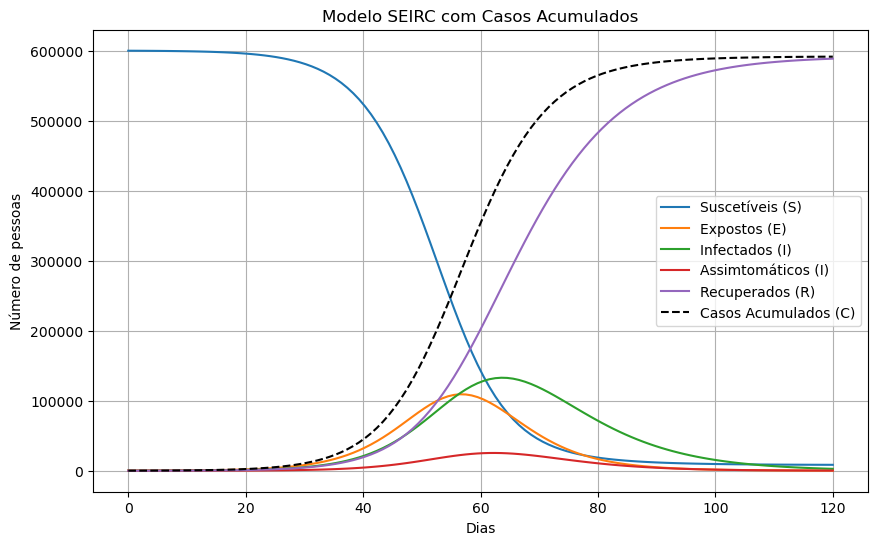

In [9]:
# Parâmetros (COVID-19 exemplo)
N = 1000000      # População total
beta = 0.5          # Taxa de transmissão (sintomáticos)
alpha = 1/5.2       # Taxa de incubação
gamma_I = 1/10      # Recuperação sintomáticos (10 dias)
gamma_A = 1/7       # Recuperação assintomáticos (7 dias)
rho = 0.2           # 20% assintomáticos
kappa = 0.5         # Transmissão relativa de assintomáticos


# Condições iniciais
E0 = 100            # 100 expostos inicialmente
I0 = 50             # 50 infectados sintomáticos
A0 = 30             # 30 assintomáticos
R0 = 0
C0 = I0 + A0        # Casos acumulados iniciais = I0 + A0
S0 = N - E0 - I0 - A0 - R0

y0 = [S0, E0, I0, A0, R0, C0]

# Tempo (dias)
t = np.linspace(0, 120, 120)

# Resolver as EDOs
out = odeint(model.SEIARC, y0, t, args=(N, beta,alpha,gamma_I,gamma_A,rho,kappa))

S,E,I,A,R,C = out.T 

# Plotar resultados
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Suscetíveis (S)')
plt.plot(t, E, label='Expostos (E)')
plt.plot(t, I, label='Infectados (I)')
plt.plot(t, A, label='Assimtomáticos (I)')
plt.plot(t, R, label='Recuperados (R)')
plt.plot(t, C, 'k--', label='Casos Acumulados (C)')
plt.xlabel('Dias')
plt.ylabel('Número de pessoas')
plt.title('Modelo SEIRC com Casos Acumulados')
plt.legend()
plt.grid()
plt.show()